# Implementación de Newton Raphson para 2 dimensiones

## 1. Implemente en Python los siguientes pasos para encontrar el mínimo o el máximo local de una función usando el método de Newton Raphson para dos dimensiones. 

In [68]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.patches import Ellipse


### Defina y grafique la función $$ y = 3x^3 - 10x^2 - 56x + 50$$

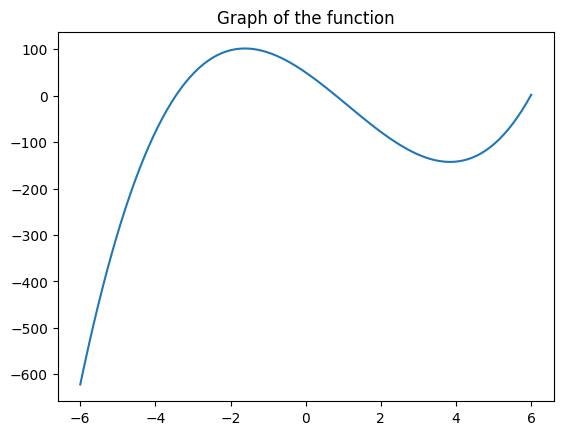

In [69]:
x = sp.symbols('x')

expr = 3*x**3 - 10*x**2 - 56*x + 50

func = sp.lambdify(x, expr, 'numpy')


range = np.linspace(-6,6,100)

values = func(range)


plt.plot(range, values)
plt.title("Graph of the function")
plt.show()

In [70]:
d1 = sp.diff(expr, x)
d2 = sp.diff(d1, x)

f_prime = sp.lambdify(x, d1, 'numpy')

f_double_prime = sp.lambdify(x, d2, 'numpy')


def NewtonRaphson(x0, a, tol):
    x = x0
    iterations = []
    while abs(f_prime(x)) > tol:
        iterations.append((x,func(x)))
        xi = x - (a*(f_prime(x)/f_double_prime(x)))
        x = xi
    return x, iterations

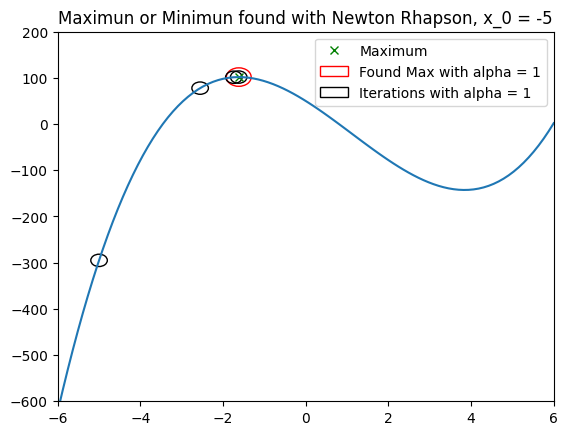

In [86]:
#Define starting point
inicio = -5

#Point found by Newton Method with alpha = 1 
min_or_max = NewtonRaphson(x0 = inicio , a=1, tol=0.0001)[0]

#Iterations by Newton Method with alpha = 1
iterations = NewtonRaphson(x0 = inicio , a=1, tol=0.0001)[1]




#Coordinates of max or min point
xy = (min_or_max, func(min_or_max))

x_range = 6 - (-6)
y_range = 200 - (-600)

# Calculate the width and height of the circle based on the aspect ratio for the Ellipse
radius = 0.3
width = radius * 2
height = (y_range / x_range) * width

#Create the Ellipse
circle1 = Ellipse(xy=xy, width=width, height=height, color='r', fill=False, label= "Found Max with alpha = 1")

#Graph the function and the max or min
fig, ax = plt.subplots()
ax = plt.gca()
ax.cla()
ax.set_xlim((-6, 6))
ax.set_ylim((-600, 200))
ax.plot(min_or_max, func(min_or_max), 'x', color='green', label = "Maximum")
ax.add_patch(circle1)
ax.plot(range, values)
ax.set_title("Maximun or Minimun found with Newton Rhapson, x_0 = -5")

#Graph the points of iteration for alpha = 1
radius = 0.2
width = radius * 2
height = (y_range / x_range) * width

circle = Ellipse(xy=iterations[0], width=width, height=height, color='black', fill=False, label= "Iterations with alpha = 1")
ax.add_patch(circle)

iterations.pop(0)

for iteration in iterations:
    circle1 = Ellipse(xy=iteration, width=width, height=height, color='black', fill=False, label= "_nolegend_")
    ax.add_patch(circle1)




plt.legend()
plt.show()